In [1]:
import os
import pickle
import tldextract
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import pearsonr,spearmanr

## Correlation

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
pol_res=pickle.load(open('../data/political_res_decoupled.pkl','rb'))
misinf_res=pickle.load(open('../data/misinf_res_decoupled.pkl','rb'))

In [28]:
final_res=pol_res.merge(misinf_res,on='screen_name')
del final_res['len_x']
del final_res['len_y']
del final_res['exp_len']
del final_res['rt_len']

In [30]:
final_res.corr()

,political_gen,political_exp,fact_gen,fact_exp
political_gen,1.000000,0.613858,-0.198666,-0.272295
political_exp,0.613858,1.000000,-0.216552,-0.225712
fact_gen,-0.198666,-0.216552,1.000000,0.502017
fact_exp,-0.272295,-0.225712,0.502017,1.000000


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors1 = plt.cm.autumn_r(np.linspace(0, 1, 64))
colors2 = plt.cm.summer(np.linspace(0, 1, 64))

colors = np.vstack((colors2, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

## Echo Chambers - Political and Factual

0.0 6949.0


<ipython-input-10-11df414f7650>:18: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  plt.imshow(heatmap, extent=extent, origin='lower',cmap='viridis',norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
<ipython-input-10-11df414f7650>:23: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  sm = plt.cm.ScalarMappable(cmap='viridis', norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))


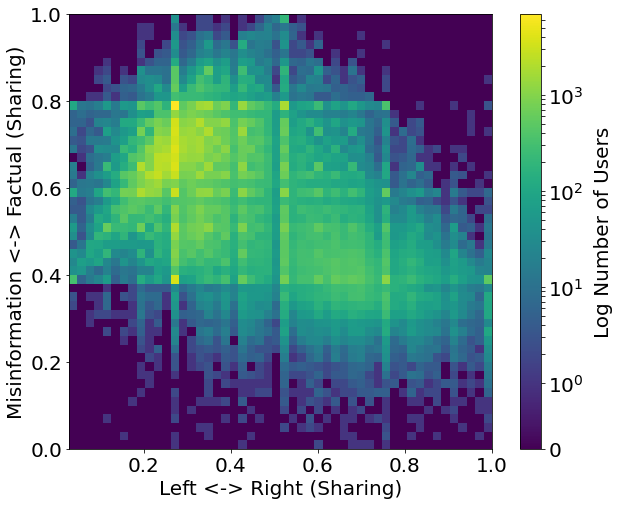

In [10]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm,LogNorm


x = final_res['political_gen'].tolist()
y = final_res['fact_gen'].tolist()

heatmap, xedges, yedges = np.histogram2d(y, x, bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(10,8))

print(heatmap.min(),heatmap.max())
plt.clf()
plt.imshow(heatmap, extent=extent, origin='lower',cmap='viridis',norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
plt.xlabel('Left <-> Right (Sharing)',fontsize=20)
plt.ylabel('Misinformation <-> Factual (Sharing)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Log Number of Users', labelpad=10, y=0.5, rotation=90, fontsize=20)
plt.show()

0.0 19182.0


<ipython-input-11-bb6dc635e0f9>:18: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  plt.imshow(heatmap, extent=extent, origin='lower',cmap='viridis',norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
<ipython-input-11-bb6dc635e0f9>:23: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  sm = plt.cm.ScalarMappable(cmap='viridis', norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))


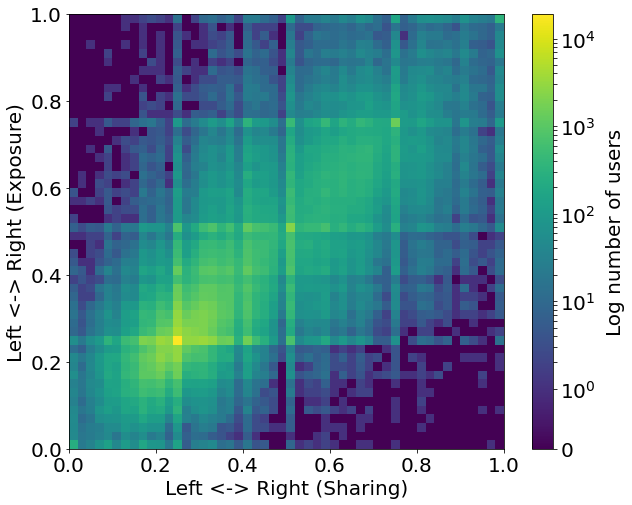

In [11]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm,LogNorm

y = final_res['political_gen'].tolist()
x = final_res['political_exp'].tolist()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(10,8))

print(heatmap.min(),heatmap.max())
plt.clf()
plt.imshow(heatmap, extent=extent, origin='lower',cmap='viridis',norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
plt.xlabel('Left <-> Right (Sharing)',fontsize=20)
plt.ylabel('Left <-> Right (Exposure)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Log number of users', labelpad=10, y=0.5, rotation=90, fontsize=20)
plt.show()

0.0 8178.0


<ipython-input-12-a1f2c11ebec5>:18: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  plt.imshow(heatmap, extent=extent, origin='lower',cmap='viridis',norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
<ipython-input-12-a1f2c11ebec5>:23: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  sm = plt.cm.ScalarMappable(cmap='viridis', norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))


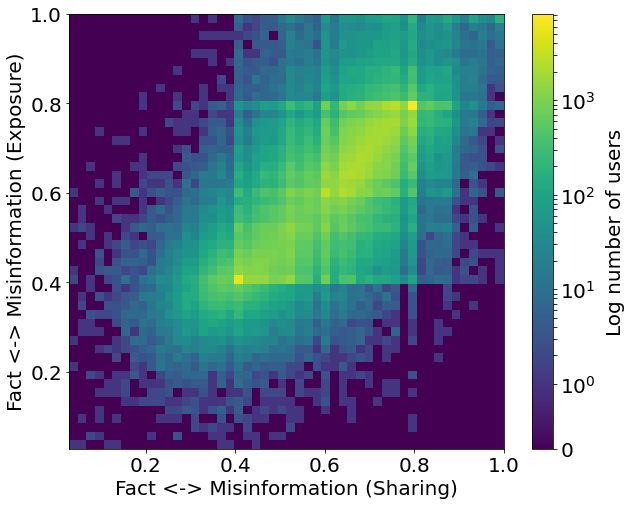

In [12]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm,LogNorm


y = final_res['fact_gen'].tolist()
x = final_res['fact_exp'].tolist()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(10,8))

print(heatmap.min(),heatmap.max())
plt.clf()
plt.imshow(heatmap, extent=extent, origin='lower',cmap='viridis',norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
plt.xlabel('Fact <-> Misinformation (Sharing)',fontsize=20)
plt.ylabel('Fact <-> Misinformation (Exposure)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=SymLogNorm(1,vmin=heatmap.min(),vmax=heatmap.max()))
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Log number of users', labelpad=10, y=0.5, rotation=90, fontsize=20)
#plt.savefig('Misinformation_Echo_Chambers.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Asymmetries

In [34]:
a=list(range(0,101))
a=[i/100 for i in a]

In [35]:
heatmap = np.zeros(shape=(100, 100))
i=0
j=0
for x in range(1,len(a)):
    j=0
    for y in range(1,len(a)):
        df=final_res[(final_res['political_exp']<a[x])&(final_res['political_exp']>=a[x-1])&(final_res['political_gen']>=a[y-1])&(final_res['political_gen']<a[y])]['fact_gen'].tolist()
        if len(df)>0:
            heatmap[i][j]=np.median(df)
        else:
            heatmap[i][j]=np.nan
        j+=1
    i+=1

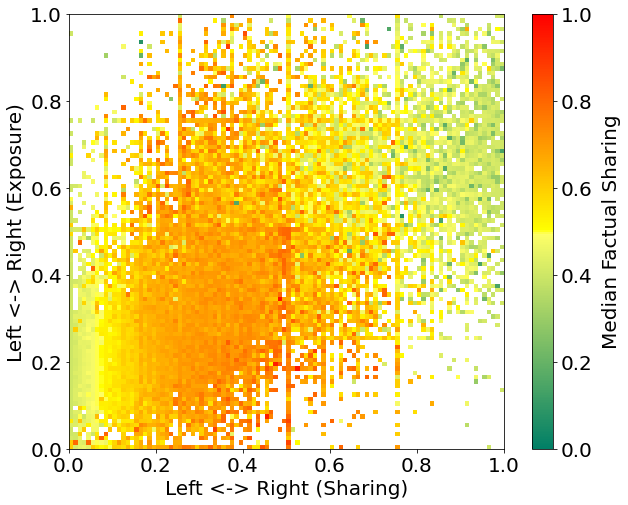

In [36]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm,LogNorm

current_cmap = mymap
current_cmap.set_bad(color='white')

extent = [0,1, 0,1]
plt.figure(figsize=(10,8))

plt.clf()
plt.imshow(heatmap, extent=extent, cmap=current_cmap,origin='lower',vmin=0,vmax=1)
plt.xlabel('Left <-> Right (Sharing)',fontsize=20)
plt.ylabel('Left <-> Right (Exposure)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sm = plt.cm.ScalarMappable(cmap=current_cmap)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Median Factual Sharing', labelpad=10, y=0.5, rotation=90, fontsize=20)
#plt.savefig('political_colored_by_fact.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [37]:
heatmap = np.zeros(shape=(100, 100))
i=0
j=0
for x in range(1,len(a)):
    j=0
    for y in range(1,len(a)):
        df=final_res[(final_res['fact_exp']<a[x])&(final_res['fact_exp']>=a[x-1])&(final_res['fact_gen']>=a[y-1])&(final_res['fact_gen']<a[y])]['political_gen'].tolist()
        if len(df)>0:
            heatmap[i][j]=np.median(df)
        else:
            heatmap[i][j]=np.nan
        j+=1
    i+=1

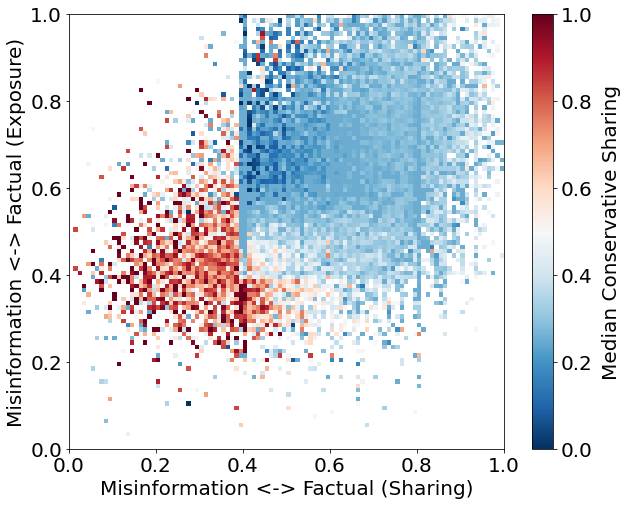

In [38]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm,LogNorm

current_cmap = matplotlib.cm.RdBu_r
current_cmap.set_bad(color='white')

extent = [0,1, 0,1]
plt.figure(figsize=(10,8))

plt.clf()
plt.imshow(heatmap, extent=extent, cmap=current_cmap,origin='lower',vmin=0,vmax=1)
plt.xlabel('Misinformation <-> Factual (Sharing)',fontsize=20)
plt.ylabel('Misinformation <-> Factual (Exposure)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sm = plt.cm.ScalarMappable(cmap=current_cmap)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Median Conservative Sharing', labelpad=10, y=0.5, rotation=90, fontsize=20)
#plt.savefig('factual_colored_by_political.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [39]:
heatmap = np.zeros(shape=(100, 100))
i=0
j=0
for x in range(1,len(a)):
    j=0
    for y in range(1,len(a)):
        df=final_res[(final_res['political_exp']<a[x])&(final_res['political_exp']>=a[x-1])&(final_res['political_gen']>=a[y-1])&(final_res['political_gen']<a[y])]['fact_exp'].tolist()
        if len(df)>0:
            heatmap[i][j]=np.median(df)
        else:
            heatmap[i][j]=np.nan
        j+=1
    i+=1

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors1 = plt.cm.YlOrBr_r(np.linspace(0.7,0.1, 64))
colors2 = plt.cm.PiYG(np.linspace(1, 0.7, 64))

colors = np.vstack((colors2, colors1))
mymap1 = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

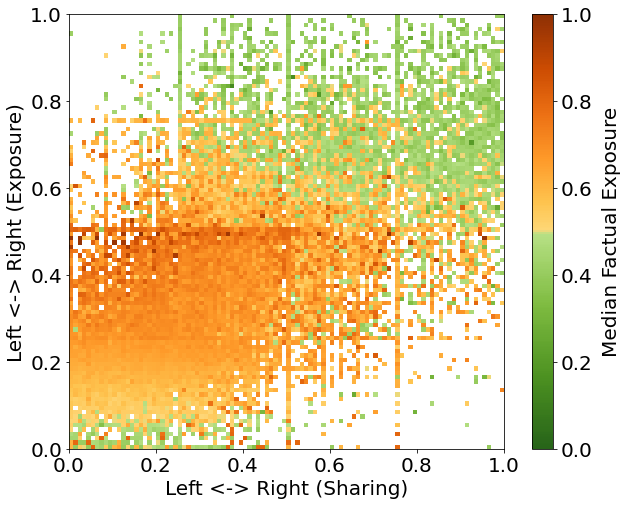

In [41]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm,LogNorm

current_cmap = mymap1
current_cmap.set_bad(color='white')

extent = [0,1, 0,1]
plt.figure(figsize=(10,8))

plt.clf()
plt.imshow(heatmap, extent=extent, cmap=current_cmap,origin='lower',vmin=0,vmax=1)
plt.xlabel('Left <-> Right (Sharing)',fontsize=20)
plt.ylabel('Left <-> Right (Exposure)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sm = plt.cm.ScalarMappable(cmap=current_cmap)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Median Factual Exposure', labelpad=10, y=0.5, rotation=90, fontsize=20)
#plt.savefig('political_colored_by_fact_exp.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [42]:
heatmap = np.zeros(shape=(100, 100))
i=0
j=0
for x in range(1,len(a)):
    j=0
    for y in range(1,len(a)):
        df=final_res[(final_res['fact_exp']<a[x])&(final_res['fact_exp']>=a[x-1])&(final_res['fact_gen']>=a[y-1])&(final_res['fact_gen']<a[y])]['political_exp'].tolist()
        if len(df)>0:
            heatmap[i][j]=np.median(df)
        else:
            heatmap[i][j]=np.nan
        j+=1
    i+=1

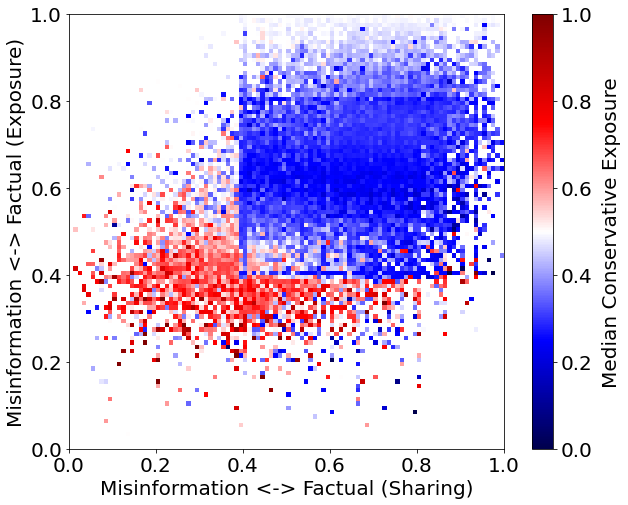

In [43]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm,LogNorm

current_cmap = matplotlib.cm.seismic
current_cmap.set_bad(color='white')

extent = [0,1, 0,1]
plt.figure(figsize=(10,8))

plt.clf()
plt.imshow(heatmap, extent=extent, cmap=current_cmap,origin='lower',vmin=0,vmax=1)
plt.xlabel('Misinformation <-> Factual (Sharing)',fontsize=20)
plt.ylabel('Misinformation <-> Factual (Exposure)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sm = plt.cm.ScalarMappable(cmap=current_cmap)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Median Conservative Exposure', labelpad=10, y=0.5, rotation=90, fontsize=20)
#plt.savefig('factual_colored_by_political_exp.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Distribution of political and factual sharing/generation scores

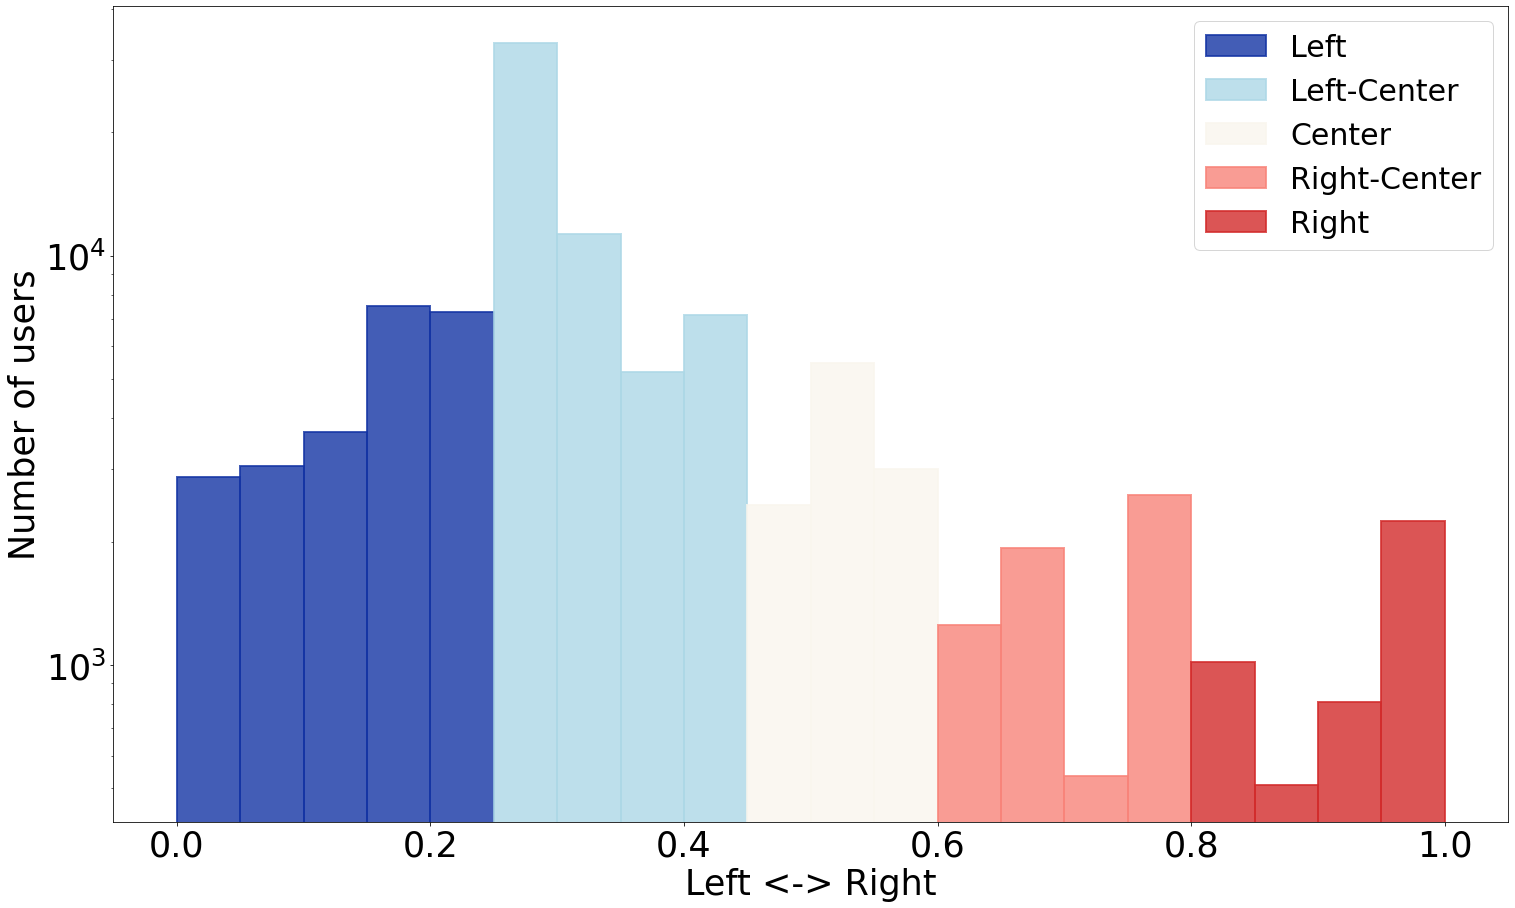

In [75]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
fig, ax1 = plt.subplots(figsize=(25,15),ncols=1)

hist_kws=dict(edgecolor="k", linewidth=2)
sns.distplot(final_res['political_gen'].tolist(),kde=False,ax=ax1,hist_kws={'alpha': 0.8, 'edgecolor':'gray', 'linewidth':2},bins=20)

ax1.patches[0].set_label('Left')
ax1.patches[5].set_label('Left-Center')
ax1.patches[9].set_label('Center')
ax1.patches[12].set_label('Right-Center')
ax1.patches[16].set_label('Right')

for p in ax1.patches:
    if  p.get_x()<=0.2:
        p.set_color('#1434A4')
    elif p.get_x()>0.2 and p.get_x()<0.45:
        p.set_color('#ADD8E6')
    elif p.get_x()>=0.45 and p.get_x()<=0.55:
        p.set_color('#F9F6EE')
    elif p.get_x()>0.55 and p.get_x()<=0.75:
        p.set_color('#F88379')
    else:
        p.set_color('#D22B2B')
    
ax1.legend(fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=35)
plt.yscale('log')
plt.xlabel('Left <-> Right',fontsize=35)
plt.ylabel('Number of users',fontsize=35)
plt.savefig('Domain-Score-Political_decoupled.pdf',dpi=300, bbox_inches='tight',pad_inches=0.05)

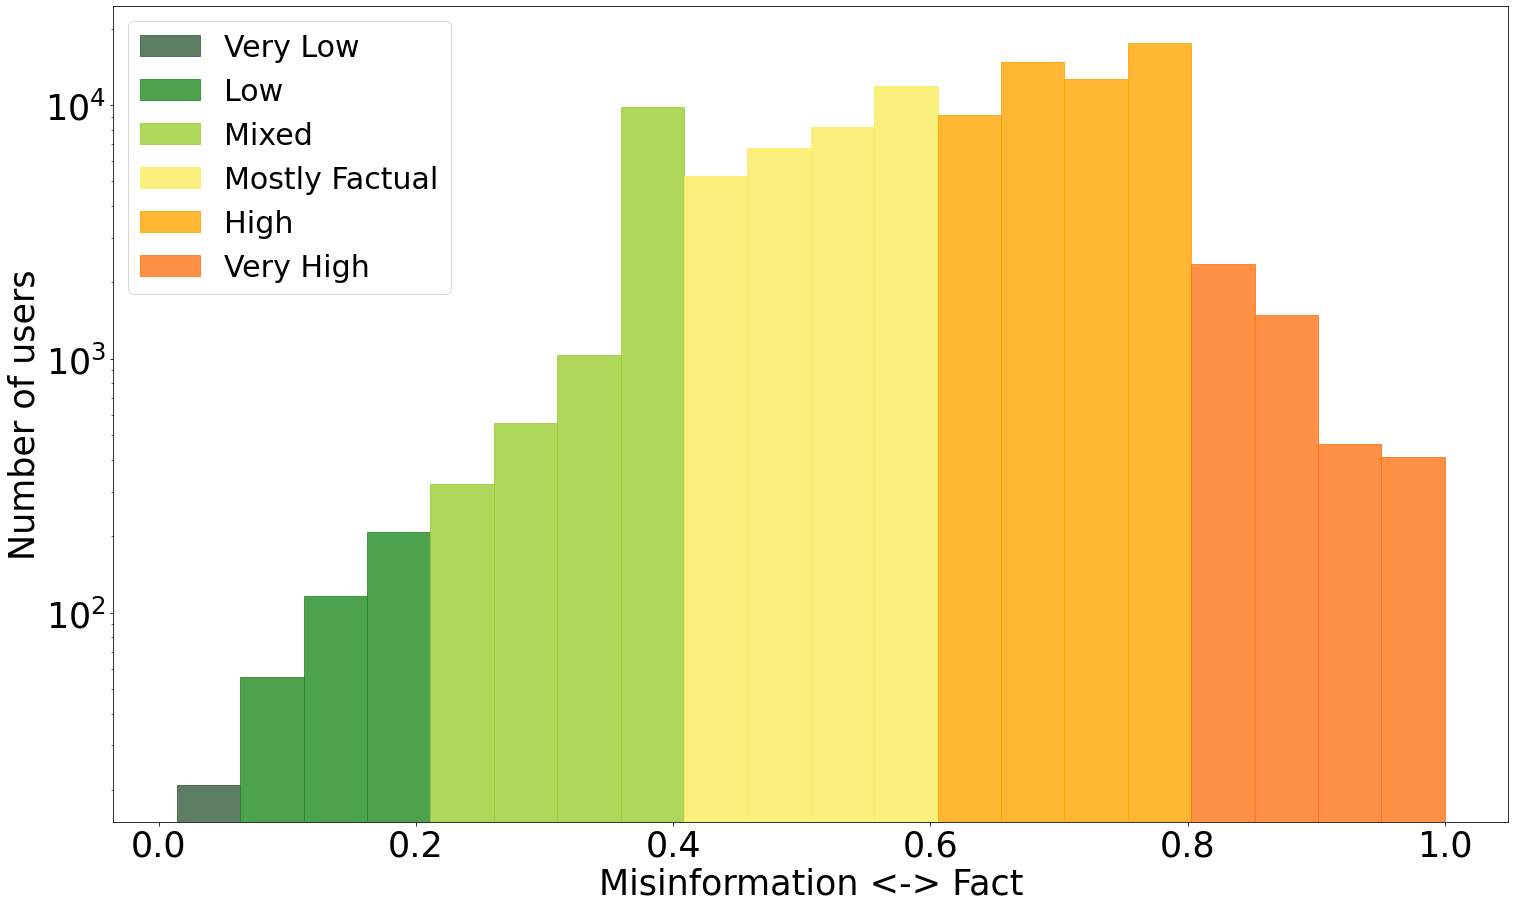

In [76]:
fig, ax2 = plt.subplots(figsize=(25,15),ncols=1)
sns.distplot(final_res['fact_gen'].tolist(),kde=False,ax=ax2,hist_kws=dict(alpha=0.8),bins=20)
ax2.patches[0].set_label('Very Low')
ax2.patches[2].set_label('Low')
ax2.patches[5].set_label('Mixed')
ax2.patches[8].set_label('Mostly Factual')
ax2.patches[12].set_label('High')
ax2.patches[16].set_label('Very High')


for p in ax2.patches:
    if  p.get_x() <= 0.05:
        p.set_color('#355E3B')#
    elif p.get_x() >0.05 and p.get_x()<=0.2:
        p.set_color('#228B22')    
    elif p.get_x() >0.2 and p.get_x()<0.4:
        p.set_color('#9ACD32')
    elif p.get_x() >=0.4 and p.get_x()<0.6:
        p.set_color('#FBEC5D')  
    elif p.get_x() >=0.6 and p.get_x()<=0.8:
        p.set_color('#FFA500')  
    else:
        p.set_color('#FF7518')
ax2.legend(fontsize=30)
ax2.tick_params(axis='both', which='major', labelsize=35)
plt.yscale('log')
plt.xlabel('Misinformation <-> Fact',fontsize=35)
plt.ylabel('Number of users',fontsize=35)
#ax2.set_title('(b) Factual', fontsize=50)
plt.savefig('Domain-Score-Factual_decoupled.pdf',dpi=300, bbox_inches='tight',pad_inches=0.05)

## Relationship b/w Excess Partisanship and Misinformation Propensity

In [54]:
def overlap(x):
    if x<0.5:
        return 1-x
    return x

In [55]:
final_res['political_gen_sc']=final_res['political_gen'].apply(overlap)
final_res['political_exp_sc']=final_res['political_exp'].apply(overlap)

In [56]:
final_res['fact_diff']=final_res['fact_gen']-final_res['fact_exp']
final_res['political_diff']=final_res['political_gen']-final_res['political_exp']
final_res['pol_polar']=final_res['political_gen_sc']-final_res['political_exp_sc']

In [58]:
a=np.arange(-0.75, 0.75, 0.015).tolist()
a.append(0.75)
a=[np.round(y,3) for y in a]

In [59]:
ybins=list(range(-50,50))
ybins=[i/100 for i in ybins]
ybins.append(0.5)

In [60]:
heatmap = np.zeros(shape=(100, 100))
i=0
j=0
for x in range(1,len(a)):
    j=0
    for y in range(1,len(ybins)):
        if x==(len(a)-1) and y==(len(ybins)-1):
            df=final_res[(final_res['fact_diff']<=a[x])&(final_res['fact_diff']>=a[x-1])&(final_res['pol_polar']>=ybins[y-1])&(final_res['pol_polar']<=ybins[y])]['political_gen'].tolist()
        elif x<(len(a)-1) and y<(len(ybins)-1):
            df=final_res[(final_res['fact_diff']<a[x])&(final_res['fact_diff']>=a[x-1])&(final_res['pol_polar']>=ybins[y-1])&(final_res['pol_polar']<ybins[y])]['political_gen'].tolist()
        elif x==(len(a)-1) and y<(len(ybins)-1):
            df=final_res[(final_res['fact_diff']<=a[x])&(final_res['fact_diff']>=a[x-1])&(final_res['pol_polar']>=ybins[y-1])&(final_res['pol_polar']<ybins[y])]['political_gen'].tolist()
        elif x<(len(a)-1) and y==(len(ybins)-1):
            df=final_res[(final_res['fact_diff']<a[x])&(final_res['fact_diff']>=a[x-1])&(final_res['pol_polar']>=ybins[y-1])&(final_res['pol_polar']<=ybins[y])]['political_gen'].tolist()

        if len(df)>0:
            heatmap[i][j]=np.median(df)
        else:
            heatmap[i][j]=np.nan
        j+=1
    i+=1

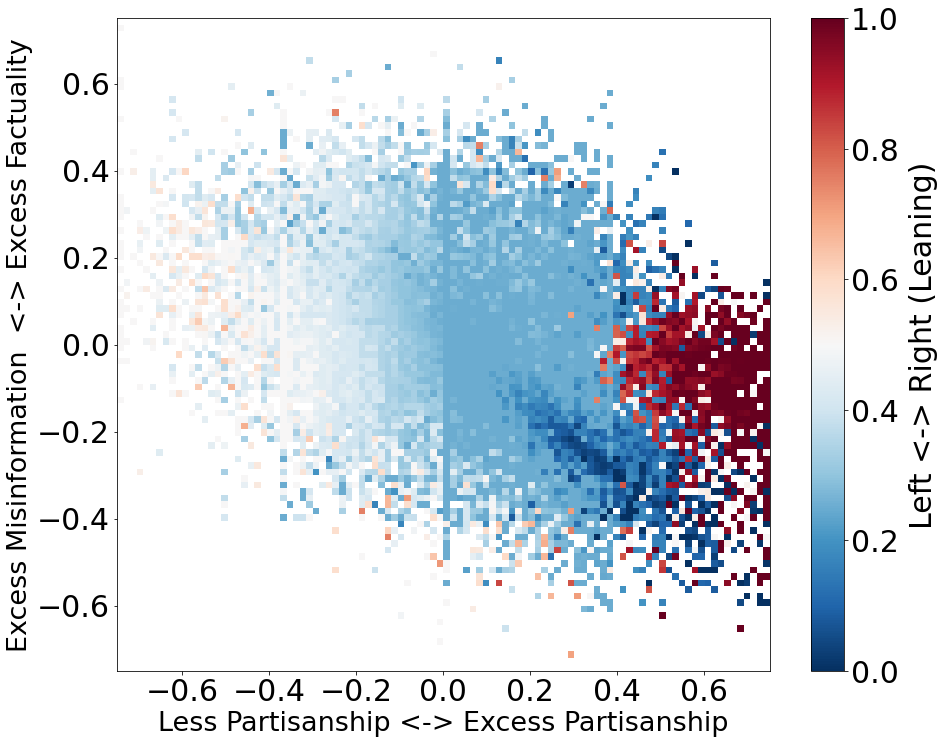

In [61]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm,LogNorm

current_cmap = matplotlib.cm.RdBu_r
current_cmap.set_bad(color='white')

extent = [-0.75,0.75, -0.75,0.75]
plt.figure(figsize=(15,12))

plt.clf()
plt.imshow(heatmap, extent=extent, cmap=current_cmap,origin='lower',vmin=0,vmax=1)
plt.xlabel('Less Partisanship <-> Excess Partisanship',fontsize=27)
plt.ylabel('Excess Misinformation  <-> Excess Factuality',fontsize=27)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sm = plt.cm.ScalarMappable(cmap=current_cmap)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Left <-> Right (Leaning)', labelpad=10, y=0.5, rotation=90, fontsize=30)
#plt.savefig('hardline_factuality_decoupled.pdf',dpi=300,bbox_inches='tight')
plt.show()

## User Activity Experiments

In [ ]:
from collections import Counter
user_act=Counter()
user_react=Counter()
rel_users=final_res['screen_name'].tolist()
filespath='../data/Coronavirus-Tweets'
files=os.listdir(filespath)
for file in tqdm(files):
    df=pickle.load(open(os.path.join(filespath,file),'rb'))
    df=df[['tweetid','screen_name','tweet_type']]
    df=df[df.screen_name.isin(rel_users)]
    df1=df[df['tweet_type']=='original']
    df2=df[df['tweet_type']=='retweeted_tweet_without_comment']
    user_act+=Counter(df1['screen_name'].tolist())
    user_react+=Counter(df2['screen_name'].tolist())

user_act=dict(user_act.most_common())
user_react=dict(user_react.most_common())

user_act_df=pd.DataFrame(user_act.items(),columns=['screen_name','tweets'])
user_react_df=pd.DataFrame(user_react.items(),columns=['screen_name','retweets'])

user_act_df=user_act_df.merge(user_react_df,on='screen_name',how='outer')
user_act_df=user_act_df.fillna(0)
user_act_df.to_pickle('../data/user_activity.pkl')

user_act_df=pickle.load(open('../data/user_activity.pkl','rb'))
final_res=final_res.merge(user_act_df,on='screen_name')

In [72]:
def smoothen(x):
    if x==0:
        return 0.001
    return x

In [73]:
final_res['tweets']=final_res['tweets'].apply(smoothen)
final_res['retweets']=final_res['retweets'].apply(smoothen)
final_res['activity']=final_res['tweets']+final_res['retweets']
final_res['activity']=final_res['activity'].apply(smoothen)
final_res['log_tweets']=final_res['tweets'].apply(np.log10)
final_res['log_retweets']=final_res['retweets'].apply(np.log10)
final_res['log_activity']=final_res['activity'].apply(np.log10)

In [74]:
misinf=final_res[final_res['fact_gen']<=0.4]
fact=final_res[final_res['fact_gen']>=0.6]

In [75]:
l=final_res[final_res['political_gen']<=0.4]
r=final_res[final_res['political_gen']>=0.6]

In [76]:
l['retweets'].median(),r['retweets'].median()

(49.0, 62.0)

In [77]:
misinf['tweets'].mean(),fact['tweets'].mean()

(57.0108630054315, 38.93618995467129)

In [78]:
misinf['retweets'].mean(),fact['retweets'].mean()

(168.2818346409173, 120.69997870463327)

In [79]:
misinf['activity'].mean(),fact['activity'].mean()

(225.2926976463488, 159.63616865930456)

In [80]:
#Misinformation users are more active on social media - more tweets and retweets

In [81]:
from scipy.stats import ttest_ind,mannwhitneyu

In [82]:
ttest_ind(fact['log_tweets'],misinf['log_tweets'],equal_var=False)

Ttest_indResult(statistic=-16.750478245541935, pvalue=3.864379726392704e-62)

In [83]:
ttest_ind(misinf['log_retweets'],fact['log_retweets'],equal_var=False,alternative='greater')

Ttest_indResult(statistic=27.42362489093299, pvalue=2.828634023849177e-160)

In [84]:
ttest_ind(misinf['log_activity'],fact['log_activity'],equal_var=False,alternative='greater')

Ttest_indResult(statistic=28.899621534916765, pvalue=5.050984771507824e-177)

In [86]:
from collections import Counter
user_rts=edge_list[edge_list.rt_screen.isin(final_res['screen_name'].tolist())]
user_rts_count=dict(Counter(user_rts['rt_screen'].tolist()).most_common())
user_rts_count_df=pd.DataFrame(user_rts_count.items(),columns=['screen_name','rt_count'])
final_res=final_res.merge(user_rts_count_df,on='screen_name',how='outer')
final_res=final_res.fillna(0)

In [87]:
final_res['rt_count']=final_res['rt_count'].apply(smoothen)
final_res['log_rt_count']=final_res['rt_count'].apply(np.log10)

In [88]:
final_res['rt/activity']=final_res['rt_count']/final_res['activity']

In [89]:
final_res['rt/activity']=final_res['rt/activity'].apply(smoothen)
final_res['log_rt/activity']=final_res['rt/activity'].apply(np.log10)

In [90]:
m=final_res[final_res['fact_gen']<=0.4]
f=final_res[final_res['fact_gen']>=0.6]

In [91]:
ttest_ind(f['log_rt/activity'],m['log_rt/activity'],alternative='greater')

Ttest_indResult(statistic=32.86711366326813, pvalue=1.619162786637865e-235)

In [92]:
m['rt/activity'].mean(),f['rt/activity'].mean()

(0.17637782930783755, 0.5752047094675478)

In [93]:
m['rt_count'].mean(),f['rt_count'].mean()

(48.822575256482246, 61.97887061548685)

In [94]:
ttest_ind(m['log_rt_count'],f['log_rt_count'],alternative='less')

Ttest_indResult(statistic=-25.640660759419045, pvalue=1.1519541779116655e-144)

In [95]:
#means of activity, attention and effectiveness/power 

In [96]:
subdf=final_res[(final_res['fact_gen']<=0.4)|(final_res['fact_gen']>=0.6)]

In [97]:
def binner(x):
    if x<=0.4:
        return 'Misinformation'
    else:
        return 'Factual'

In [98]:
subdf['fact']=subdf['fact_gen'].apply(binner)

<ipython-input-98-0fd731689342>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['fact']=subdf['fact_gen'].apply(binner)


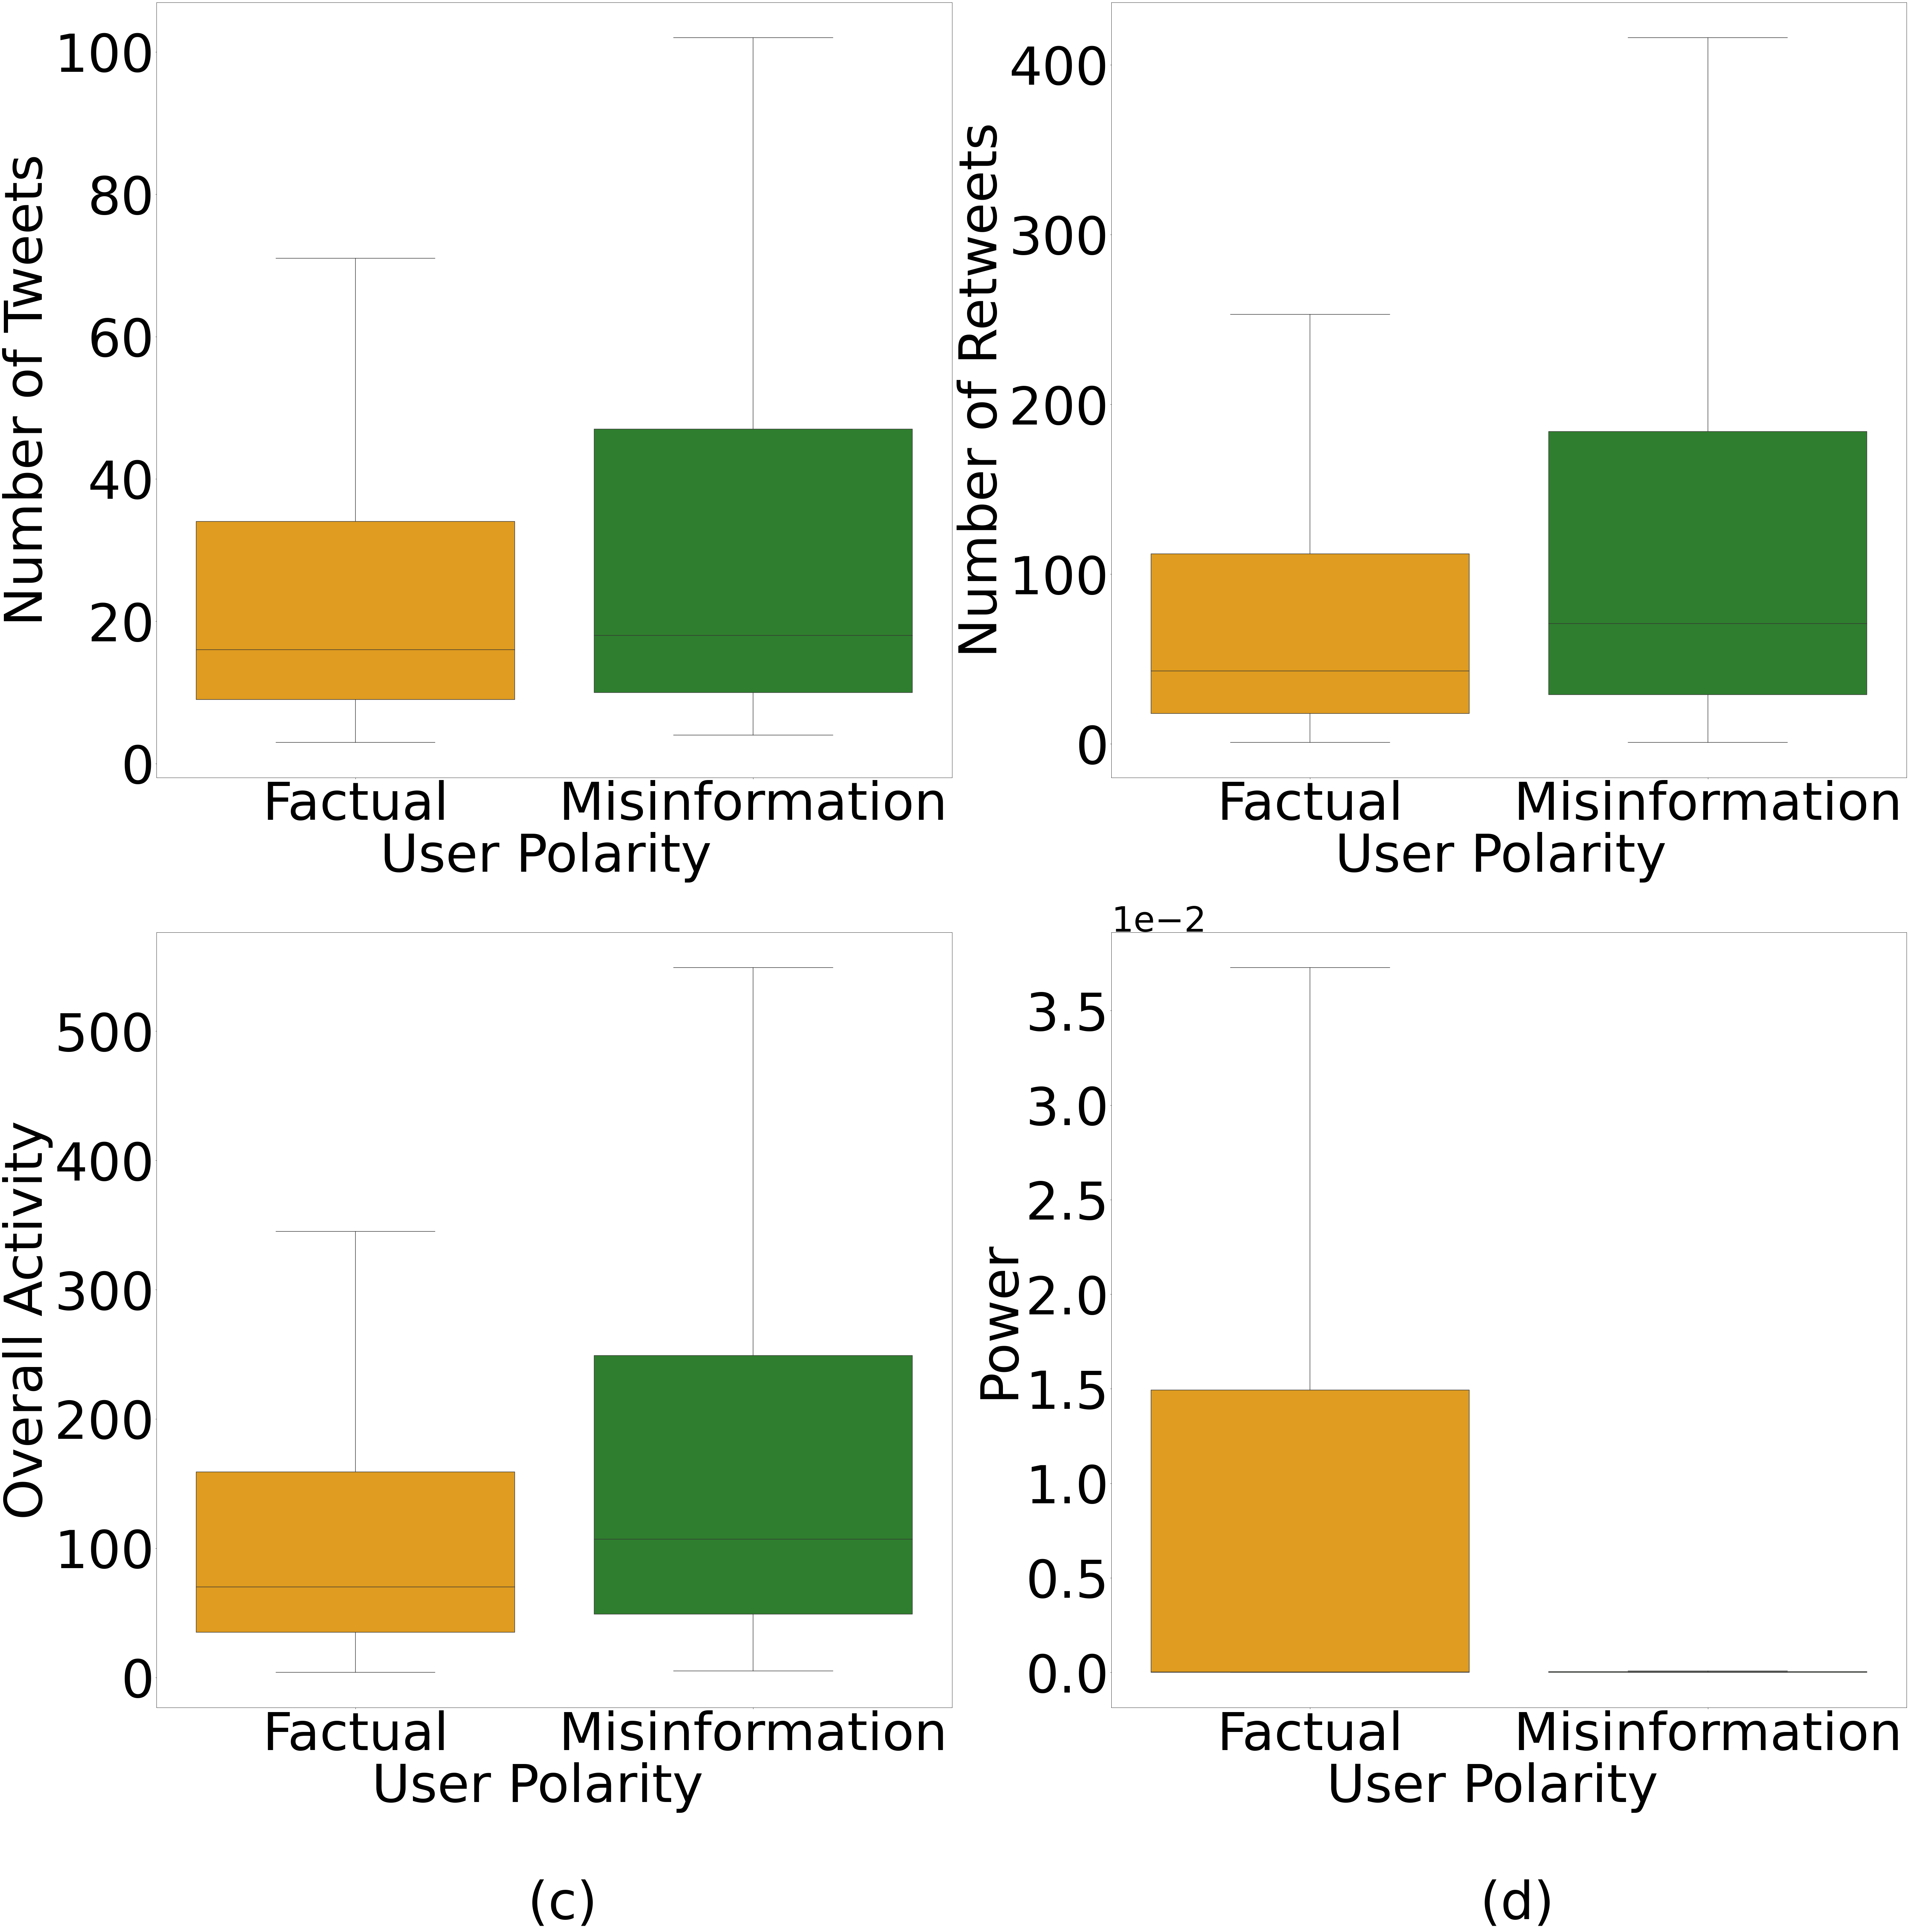

In [103]:
my_pal = {"Factual": "orange", "Misinformation": "#228B22"}

plt.figure(figsize=(90,90))
plt.subplot(2,2,1)
sns.boxplot(x='fact',y='tweets',data=subdf,showfliers = False,palette=my_pal)
plt.xlabel('User Polarity \n\n (a)',fontsize=150)
plt.ylabel('Number of Tweets',fontsize=150)
plt.xticks(fontsize=150)
plt.yticks(fontsize=150)

plt.subplot(2,2,2)
sns.boxplot(x='fact',y='retweets',data=subdf,showfliers = False,palette=my_pal)
plt.xlabel('User Polarity \n\n (b)',fontsize=150)
plt.ylabel('Number of Retweets',fontsize=150)
plt.xticks(fontsize=150)
plt.yticks(fontsize=150)

plt.subplot(2,2,3)
sns.boxplot(x='fact',y='activity',data=subdf,showfliers = False,palette=my_pal)
plt.xlabel('User Polarity  \n\n (c)',fontsize=150)
plt.ylabel('Overall Activity',fontsize=150)
plt.xticks(fontsize=150)
plt.yticks(fontsize=150)

plt.subplot(2,2,4)
sns.boxplot(x='fact',y='rt/activity',data=subdf,showfliers = False,palette=my_pal)
plt.xlabel('User Polarity  \n\n (d)',fontsize=150)
plt.ylabel('Power',fontsize=150)
plt.xticks(fontsize=150)
plt.yticks(fontsize=150)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax=plt.gca()
ax.yaxis.offsetText.set_fontsize(100)
#plt.savefig('activity_decoupled.pdf',dpi=400,bbox_inches='tight')
plt.show()

## Distribution of Pay-Level Domains by Exposure and Leaning

In [115]:
from collections import Counter

In [116]:
final_res['gen_count']=final_res['cleaned_links_y'].apply(len)
final_res['exp_count']=final_res['cleaned_full_exp_y'].apply(len)
gen_links=final_res['gen_count'].tolist()
exp_links=final_res['exp_count'].tolist()

In [117]:
gen_links_count=dict(Counter(gen_links).most_common())
exp_links_count=dict(Counter(exp_links).most_common())

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(list(gen_links_count.keys()),list(gen_links_count.values()),label='Sharing')
sns.scatterplot(list(exp_links_count.keys()),list(exp_links_count.values()),label='Exposure')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of PLDs',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.legend(loc='best', prop={'size': 20})
plt.show()
#plt.savefig('pld-distribution_decoupled.pdf',dpi=300,bbox_inches='tight')